In [1]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 4 번째 칸 100개 출력(타겟 데이터)
y = np.where(y == 'Iris-setosa', -1, 1) # 1(Iris-setosa), -1(Iris-virginica)

X = df.iloc[0:100, [0, 2]].values # 0 => 꽃 받침 길이, 2 => 꽃잎 길이


Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

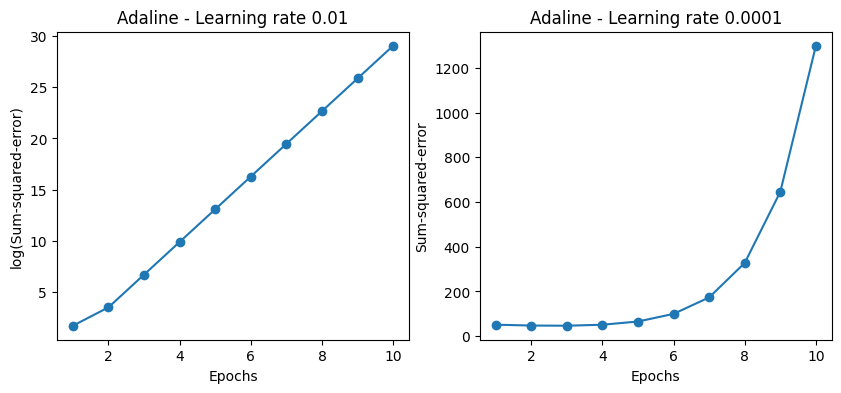

In [21]:
import numpy as np
from AdalineGD import AdalineGD
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.00059995559).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.00059995559')